In [131]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timezone
import requests
from io import StringIO
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [132]:
# defining stonks and dates. change to user input later
stonk_code = 'AMC'
hist_date = '01-01-2010'
today = dt.today()

In [133]:
# converting dates to Unix timestamps
unix_hist = dt.strptime(hist_date,'%m-%d-%Y').replace(tzinfo=timezone.utc).timestamp()
unix_today = end_date.replace(tzinfo=timezone.utc).timestamp()

In [134]:
# getting stonk history from Yahoo! Finance
link = (f'https://query1.finance.yahoo.com/v7/finance/download/'
        f'{stonk_code}?period1={int(unix_hist)}&period2={int(unix_today)}&interval=1d&events=history')
b = requests.get(link)
s = str(b.content,'utf-8')
s_io = StringIO(s)
stonks = pd.read_csv(s_io,encoding='utf-8',parse_dates=['Date'])

In [135]:
# defining how far ahead user wants to predict
days_ahead = 30 # change to user input
stonks[f'{days_ahead}_days'] = np.nan
for ind in stonks.index:
    try:
        stonks.loc[ind,f'{days_ahead}_days'] = stonks.loc[ind+days_ahead,'Open']
    except:
        pass

In [136]:
# converting Date column to numeric data
try:
    stonks['Date'] = stonks['Date'].map(dt.toordinal)
except:
    pass

In [144]:
# defining independent & dependent variables, train/test split
x = stonks.dropna().loc[:,['Date','Open','High']]
y = stonks.dropna().loc[:,f'{days_ahead}_days']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

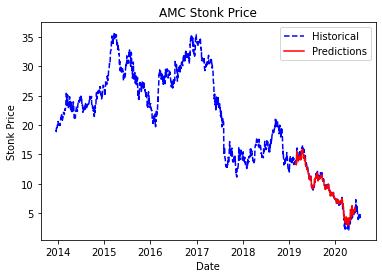

Score: 0.7003621830929636


In [145]:
# model & predictions
lm = LinearRegression()
model = lm.fit(x_train,y_train)
test_predictions = lm.predict(x_test)
plt.plot(stonks.Date.map(dt.fromordinal),stonks.Open,'b--',label='Historical')
plt.plot(x_test.Date.map(dt.fromordinal),test_predictions,'r-',label='Predictions')
plt.xlabel('Date')
plt.ylabel('Stonk Price')
plt.title(f'{stonk_code} Stonk Price')
plt.legend(loc=0,frameon=True)
plt.show()
score = model.score(x_test,y_test)
print('Score:',score)

In [141]:
# predicting future stonks
pred_date = '08-18-2020' # change to user input
unix_pred = dt.strptime(pred_date,'%m-%d-%Y').replace(tzinfo=timezone.utc).timestamp()
print(range(int(unix_today),int(unix_pred)))

range(1595109478, 1597708800)
